---
##**FINAL PROJECT 2 (KELOMPOK 6)**
---

>Nama Anggota :
- Rachma Lingga Maulidya    (PYTN-KS13-024)
- Reza Pramudya Bagaskara   (PYTN-KS13-010)
- Syahrindra Dzaky Ramadhan (PYTN-KS13-014)

---
#**Perkenalan**
---

##**Latar Belakang**
Australia memiliki iklim yang sangat bervariasi. Tidak jarang satu daerah mengalami kekeringan sementara air banjir menyebabkan kerusakan di tempat lain. Ditumpangkan ke variabilitas iklim ini adalah perubahan curah hujan jangka panjang. Bagi Negara Australia, prediksi curah hujan yang akurat menjadi salah satu hal yang diperlukan. Pada final project ke-4 ini berfokus pada penggunaan konsep Classification dengan Logistic Regression dan SVM terhadap data curah hujan di Australia.

##**Dataset**

Dataset _"weatherAUS.csv"_ merupakan kumpulan data yang berisi observasi harian perkiraan hujan di seluruh daerah Australia selama 10 tahun. Dataset ini terdiri dari 23 _attribute_ dan 145460 baris. Kolom _RainTomorrow_ adalah target variable yang akan diprediksi. Jika “Yes” maka besok harinya disana akan terjadi hujan 1mm atau lebih, namun bila "No" maka tidak terjadi hujan besoknya.

>Dataset yang digunakan pada analisis ini yaitu Rain in Australia. Dataset yang diunduh dari kaggle melalui link berikut _[rideshare_kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)_


##**Atribute Information**
>1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. ...... dan lainnya.

##**Project Objective**
Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM, diantaranya
- mampu memahami konsep Classification dengan Logistic Regression dan SVM.
- mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi.

---
##**Import Library**
---

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import pickle

---
##**Data Loading**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS_2.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.shape

(145460, 23)

Maka data tersebut memiliki 145460 baris dan 23 kolom.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari hasil diatas dapat dilihat bahwa variabel yang terdapat pada dataset weatherAUS.csv berjumlah sebanyak 23 variabel, dan memiliki 2 jenis tipe data yang terdiri dari object dan float.

Dapat dilihat pula bahwa terdapat kekurangan data pada hampir seluruh kolom. Maka dari itu missing values tersebut harus diatasi.

In [ ]:
#Melihat banyaknya unique value
for col in df.columns:
    print(col,': ', df[col].nunique())

Date :  3436
Location :  49
MinTemp :  389
MaxTemp :  505
Rainfall :  681
Evaporation :  358
Sunshine :  145
WindGustDir :  16
WindGustSpeed :  67
WindDir9am :  16
WindDir3pm :  16
WindSpeed9am :  43
WindSpeed3pm :  44
Humidity9am :  101
Humidity3pm :  101
Pressure9am :  546
Pressure3pm :  549
Cloud9am :  10
Cloud3pm :  10
Temp9am :  441
Temp3pm :  502
RainToday :  2
RainTomorrow :  2


In [ ]:
#Melihat statistik data secara umum
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
#Mengecek statistik deskriptif dari masing-masing atribut yang bertipe object
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


---
##**Data Cleaning**
---

In [ ]:
#Mengecek jumlah data yang duplikat
df.duplicated().sum()

0

In [ ]:
#Mengecek keberadaan mising value
df.isnull().values.any()

True

Karena jawabannya _True_, maka terdapat missing value.

In [ ]:
#Mengecek jumlah missing value tiap atribut
missing_value = df.isnull().sum()
missing_value

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

 Terdapat banyak missing value pada setiap kolom sehingga perlu dilakukan cleaning atau pembersihan.

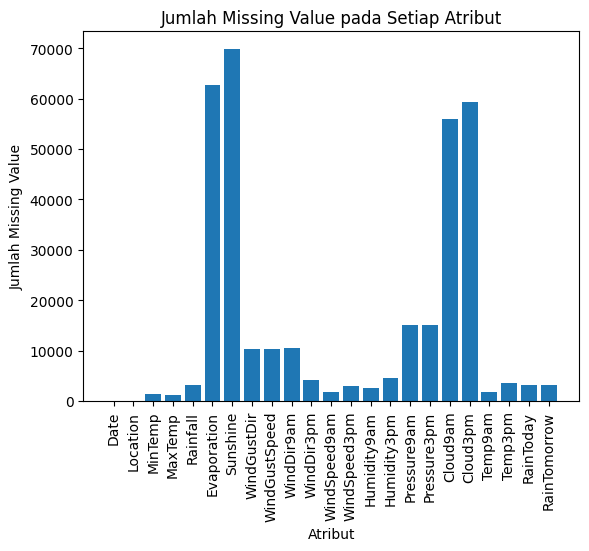

In [ ]:
# Plot bar chart
plt.bar(missing_value.index, missing_value.values)

# Menambahkan judul
plt.title('Jumlah Missing Value pada Setiap Atribut')

# Menambahkan label sumbu x dan y
plt.xlabel('Atribut')
plt.ylabel('Jumlah Missing Value')

# Menampilkan bar chart
plt.xticks(rotation=90)
plt.show()

Dapat dilihat pada barchart diatas bahwa jumlah missing value terbanyak terdapat pada atribut sunshine dengan jumlah 69835 missing value, dan juga mising value terbanyak terdapat pada kolom Evaporation, Cloud9am, dan Cloud3pm. 
<br>
Adapun presentase jumlah missing value di tiap atribut terhadap data ini adalah sebagai berikut.

In [ ]:
#Presentase missing value pada tiap kolom
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
missing_value

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

In [ ]:
#remove nilai null atau nan
df = df.dropna()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [ ]:
#Mengecek kembali keberadaan mising value
df.isnull().values.any()

False

Karena jawabannya False maka missing value telah teratasi.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

Setelah Cleaning data dengan menghapus missing value data tersisa 56420 data.
<br><br>
Kami hanya akan menggunakan kolom Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm, RainToday, RainTomorrow.

In [ ]:
# Mengubah dtype pada kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-92-f02eddf2d884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month']= df['Date'].dt.month

<ipython-input-93-6750ae053ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-93-6750ae053ce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']= df['Date'].dt.month


Berdasarkan kode diatas, dengan mengubah tipe data kolom 'Date' menjadi datetime, kita dapat dengan mudah memanipulasi data tanggal dan waktu untuk menjawab pertanyaan analisis yang berkaitan dengan tren, musiman, dan pola data. 

In [ ]:
# Menghilangkan kolom Date
df = df.drop(columns='Date') 
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,2017,6
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,2017,6
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,2017,6
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,2017,6


---
##**Data Exploration**
---

**Data Query and Grouping**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

In [ ]:
#Melihat statistik data secara umum
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,2010.000000,3.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,2012.000000,6.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,2014.000000,9.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000


**Berikut ini adalah View data untuk mengetahui banyak nya jumlah dari setiap atribut dan distribusi nilainya.**

1. Location
2. Minimum & Maximum Temperature
3. Curah Hujan
4. Evaporasi
5. Sinar Matahari
6. Kecepatan Angin
7. Kelembaban
8. Intensitas Awan
9. Hujan Hari ini dan Besok

In [ ]:
#Location
print('Location : ')
print(df['Location'].value_counts())

Location : 
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64


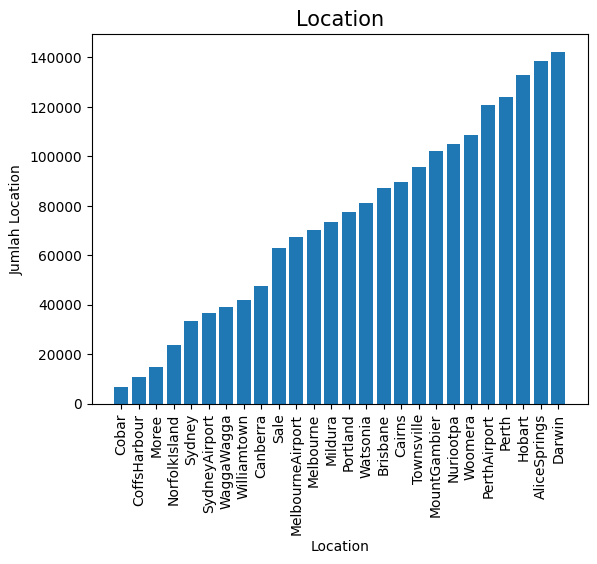

In [ ]:
# Plot bar chart
plt.bar(df['Location'].values, df['Location'].index)

# Menambahkan judul
plt.title('Location', size = 15)

# Menambahkan label sumbu x dan y
plt.xlabel('Location')
plt.ylabel('Jumlah Location')

# Menampilkan bar chart
plt.xticks(rotation=90)
plt.show()


Nilai yang paling banyak pada kolom Location adalah pada daerah Darwin, dan paling sedikit adalah Cobar.

In [ ]:
#Minimum Temperature
print('Minimum Temperature : ')
print(df['MinTemp'].value_counts())

Minimum Temperature : 
 13.0    349
 9.6     342
 8.5     333
 9.7     331
 12.5    331
        ... 
 31.4      1
-5.3       1
-3.8       1
-5.8       1
-6.7       1
Name: MinTemp, Length: 348, dtype: int64


<ipython-input-100-dfa0840e960c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MinTemp'])


Text(0.5, 1.0, 'Minimum Temperature')

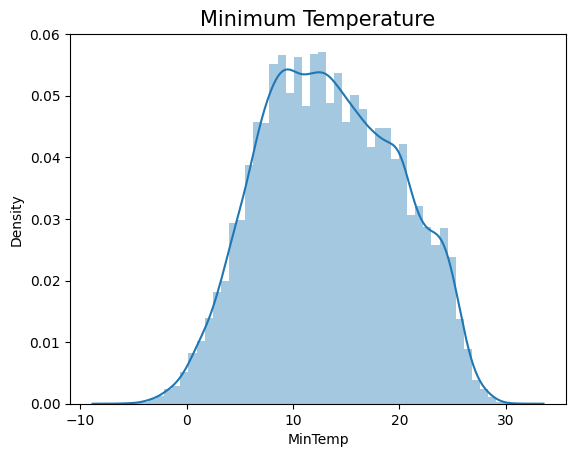

In [ ]:
sns.distplot(df['MinTemp'])
plt.title('Minimum Temperature', size = 15)

Distribusi nilai yang terdapat pada kolom MinTemp Distribusi yang morong ke kanan.

In [ ]:
#Maximum Temperature
print('Maximum Temperature : ')
print(df['MaxTemp'].value_counts())

Maximum Temperature : 
19.6    303
18.2    300
19.4    300
20.1    298
23.5    294
       ... 
45.4      1
47.3      1
45.8      1
6.3       1
7.5       1
Name: MaxTemp, Length: 395, dtype: int64


<ipython-input-102-de07694f8317>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxTemp'])


Text(0.5, 1.0, 'Maximum Temperature')

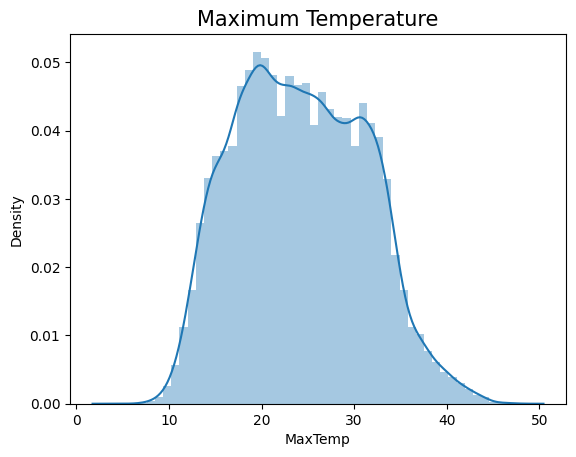

In [ ]:
sns.distplot(df['MaxTemp'])
plt.title('Maximum Temperature', size = 15)

Distribusi nilai dari kolom MaxTemp juga miring ke kanan.

In [ ]:
#Rainfall
print('Curah Hujan : ')
print(df['Rainfall'].value_counts())

Curah Hujan : 
0.0      36709
0.2       3009
0.4       1593
0.6       1087
0.8        834
         ...  
29.9         1
182.6        1
81.8         1
89.2         1
70.8         1
Name: Rainfall, Length: 410, dtype: int64


<ipython-input-104-b5ac2c4d371c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'])


Text(0.5, 1.0, 'Curah Hujan')

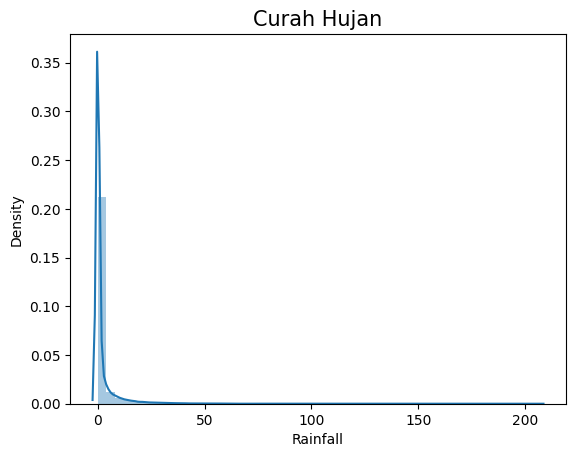

In [ ]:
sns.distplot(df['Rainfall'])
plt.title('Curah Hujan', size = 15)

Dari kolom Rainfall distribusi nilai sangat tidak merata. curah hujan rendah lebih seringh terjadi.

In [ ]:
#Evaporation
print('Evaporasi : ')
print(df['Evaporation'].value_counts())

Evaporasi : 
4.0     2263
8.0     1745
2.2     1393
3.4     1365
2.4     1353
        ... 
37.4       1
33.6       1
28.6       1
48.8       1
25.0       1
Name: Evaporation, Length: 259, dtype: int64


<ipython-input-106-5aeb6dd5818e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Evaporation'])


Text(0.5, 1.0, 'Evaporasi')

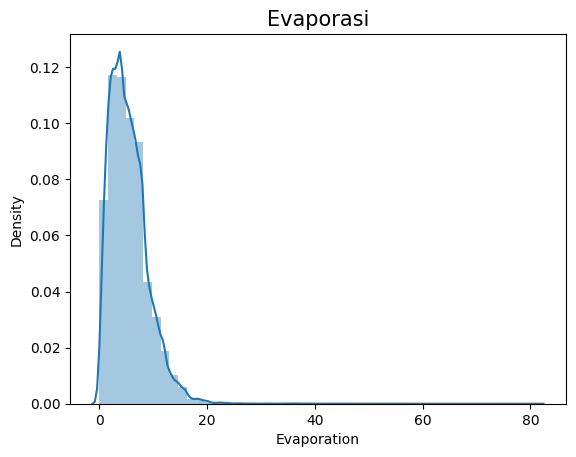

In [ ]:
sns.distplot(df['Evaporation'])
plt.title('Evaporasi', size = 15)

pada kolom evaporasi evaporasi terjadi dengan intensitas rendah lebih sering terjadi menyebabkan distribusi condong ke kiri.

In [ ]:
#Sunshine
print('Sinar Matahari : ')
print(df['Sunshine'].value_counts())

Sinar Matahari : 
0.0     1658
11.0     879
10.8     878
10.7     878
10.5     842
        ... 
14.0      10
14.1       3
14.3       3
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64


<ipython-input-108-fe6d69f9c4d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sunshine'])


(0.0, 15.0)

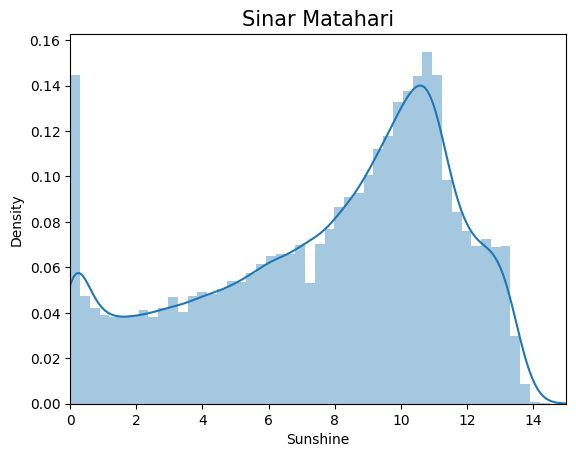

In [ ]:
sns.distplot(df['Sunshine'])
plt.title('Sinar Matahari', size = 15)
plt.xlim(0, 15)

Dari kolom Sunshine sinar matahari cukup tinggi dan miring ke kanan nanmun terkadang tidak terdapat sinar matahari.

In [ ]:
#WindGustSpeed
print('Kecepatan Angin : ')
print(df['WindGustSpeed'].value_counts())

Kecepatan Angin : 
35.0     3965
39.0     3884
37.0     3727
31.0     3582
33.0     3580
         ... 
113.0       2
122.0       1
9.0         1
124.0       1
111.0       1
Name: WindGustSpeed, Length: 61, dtype: int64


<ipython-input-110-a3ef4f5d73c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WindGustSpeed'])


Text(0.5, 1.0, 'Kecepatan Angin')

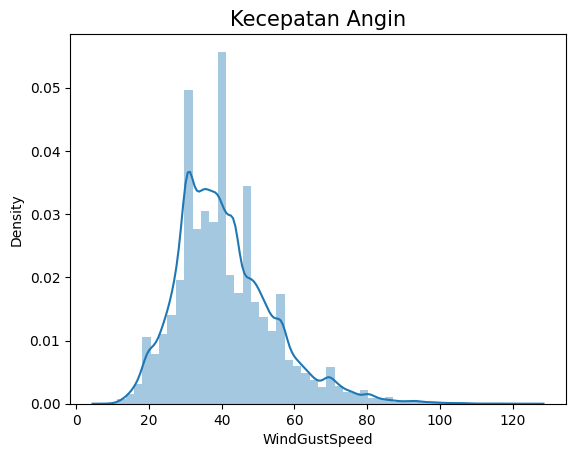

In [ ]:
sns.distplot(df['WindGustSpeed'])
plt.title('Kecepatan Angin', size = 15)

Kecepatan angin cukup bervariasi, distribusi nilai nya miring ke kiri.

In [ ]:
#Humidity9am
print('Kelembapan 9 Pagi : ')
print(df['Humidity9am'].value_counts())

Kelembapan 9 Pagi : 
68.0    1314
67.0    1300
69.0    1288
65.0    1286
64.0    1277
        ... 
4.0       14
3.0        7
2.0        6
1.0        3
0.0        1
Name: Humidity9am, Length: 101, dtype: int64


<ipython-input-112-7b00f16d2f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity9am'])


Text(0.5, 1.0, 'Kelembapan 9 Pagi')

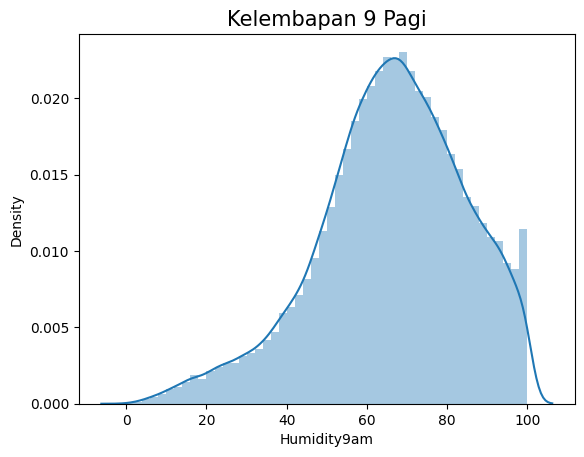

In [ ]:
sns.distplot(df['Humidity9am'])
plt.title('Kelembapan 9 Pagi', size = 15)

Nilai Kelembapan pada sembilan pagi menunjukan distribusi nilai yang miring ke kanan

In [ ]:
#Humidity3pm
print('Kelembapan 3 Sore : ')
print(df['Humidity3pm'].value_counts())

Kelembapan 3 Sore : 
52.0     1250
54.0     1202
55.0     1181
51.0     1172
53.0     1170
         ... 
100.0      50
3.0        41
2.0        29
1.0        13
0.0         3
Name: Humidity3pm, Length: 101, dtype: int64


<ipython-input-114-2cab037e63e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity3pm'])


Text(0.5, 1.0, 'Kelembapan 3 Sore')

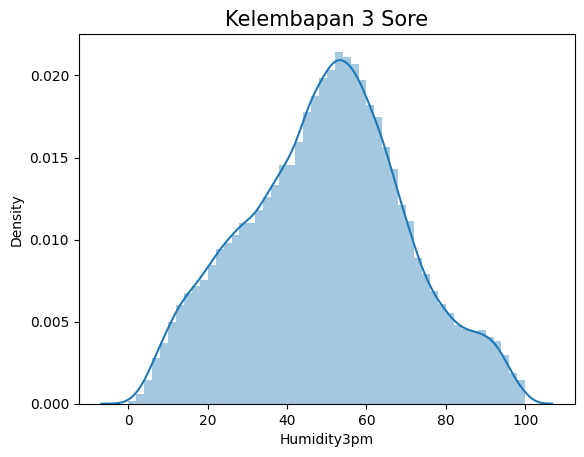

In [ ]:
sns.distplot(df['Humidity3pm'])
plt.title('Kelembapan 3 Sore', size = 15)

Kelembapan yang terjadi padda 3 sore memiliki nilai distribusi yang normal.

In [ ]:
#Cloud9am
print('Intensitas Awan 9 Pagi : ')
print(df['Cloud9am'].value_counts())

Intensitas Awan 9 Pagi : 
7.0    14394
1.0    10677
8.0     5487
6.0     5403
0.0     5262
2.0     4378
3.0     4221
5.0     3757
4.0     2841
Name: Cloud9am, dtype: int64


<ipython-input-116-a001c91db6ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cloud9am'])


Text(0.5, 1.0, 'Intensitas Awan 9 Pagi')

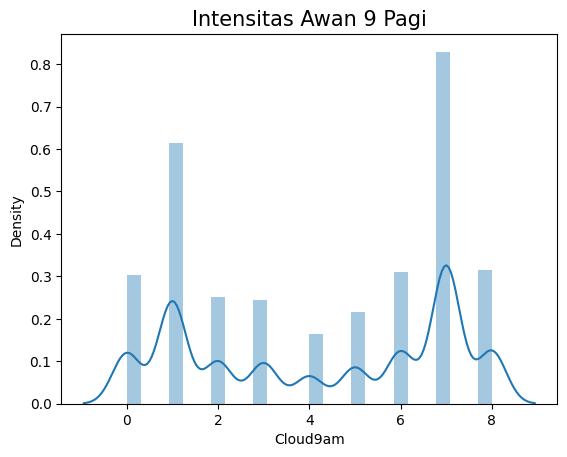

In [ ]:
sns.distplot(df['Cloud9am'])
plt.title('Intensitas Awan 9 Pagi', size = 15)

Nilai Intensitas awan tertinggi berada pada 0.7 dan terendah pada 0.4

In [ ]:
#Cloud3pm
print('Intensitas Awan 3 Sore : ')
print(df['Cloud3pm'].value_counts())

Intensitas Awan 3 Sore : 
7.0    13809
1.0    10162
6.0     6287
2.0     4961
3.0     4864
8.0     4724
5.0     4672
0.0     3470
4.0     3470
9.0        1
Name: Cloud3pm, dtype: int64


<ipython-input-118-062053d78c29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cloud3pm'])


Text(0.5, 1.0, 'Intensitas Awan 3 Sore')

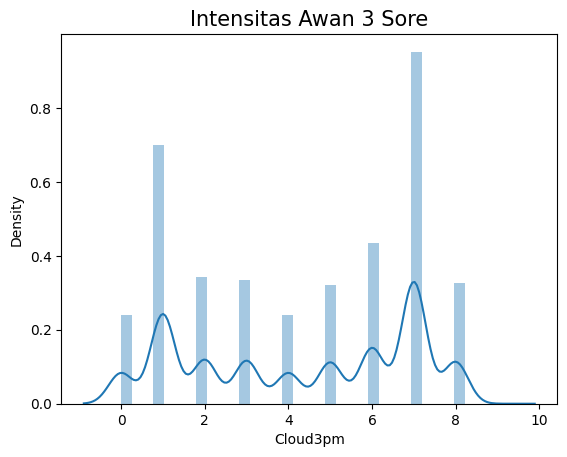

In [ ]:
sns.distplot(df['Cloud3pm'])
plt.title('Intensitas Awan 3 Sore', size = 15)

Intensitas awan pada 3 sore memiliki kesamaan dengan intensitas awan 9 pagi yakni tertinggi 0.7 dan terendah 0.4

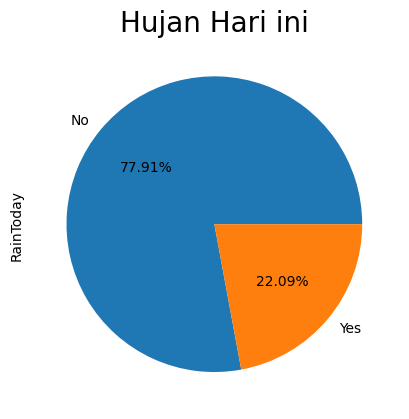

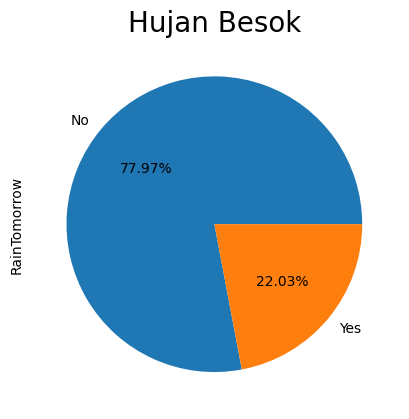

In [ ]:
#Membuat pie chart untuk RainToday
counts = df['RainToday'].value_counts()
counts.plot.pie(autopct='%.2f%%')
plt.title('Hujan Hari ini', size= 20)
plt.show()

#Membuat pie chart untuk RainTomorrow
counts = df['RainTomorrow'].value_counts()
counts.plot.pie(autopct='%.2f%%')
plt.title('Hujan Besok', size= 20)
plt.show()

#Menampilkan plot
plt.show()

Dari pie chart diatas dapat dilihat bahwa nilai dari hujan yang terjadi antara hari ini dan hujan yang terjadi esok hari memiliki nilai yang hampir sama atau mendekati.

**Mengelompokkan dan Menjumlahkan Rata Rata Curah Hujan Per Tahun**

In [ ]:
#Mengetahui Rata-rata Curah Hujan Tiap Bulan
rainfallmonth = df[['Rainfall','Year']].groupby(['Year'], as_index=False).agg({'Rainfall':'mean'})
rainfallmonth

,Year,Rainfall
0,2007,3.219672
1,2008,2.080586
2,2009,1.874297
3,2010,2.549865
4,2011,2.644590
5,2012,1.961856
6,2013,2.012772
7,2014,1.837385
8,2015,1.932790
9,2016,2.082197


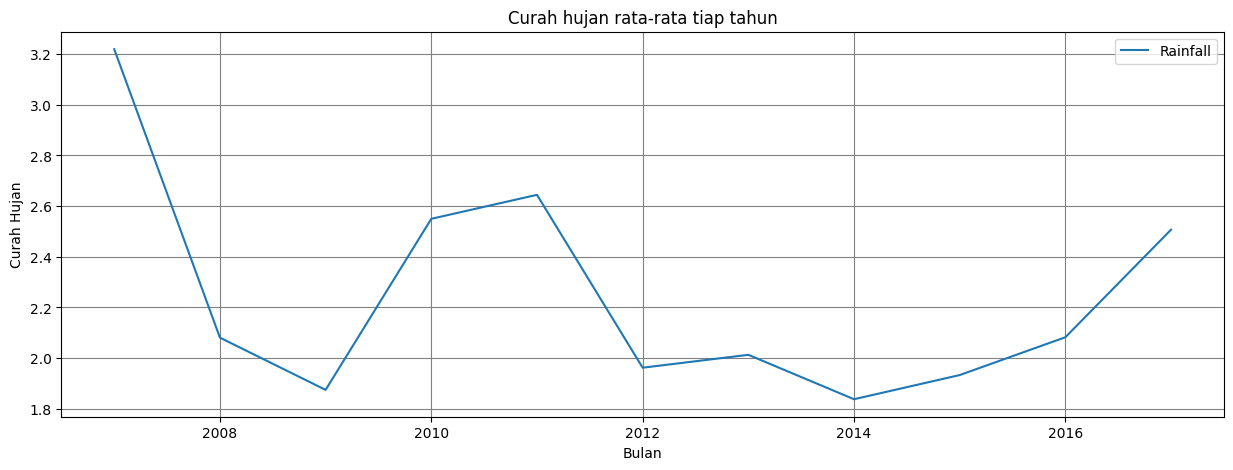

In [ ]:
#Visualisasi Curah Hujan Tiap Tahun
rainfallmonth.plot(kind='line', x='Year', y='Rainfall', figsize=(15,5))

plt.title('Curah hujan rata-rata tiap tahun')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan')
plt.grid(color="grey")

plt.show()

Berdasarkan line plot curah hujan rata rata tiap tahun diatas, dapat dilihat bahwa curah hujan tertinggi terjadi pada tahun 2007 yaitu 3.219672. Adapun yang terendah berada pada tahun 2014 yaitu 1.837385.

**Mengelompokkan dan Menjumlahkan Rata Rata Curah Hujan di Tiap Lokasi**

In [ ]:
#Proporsi data lokasi dan curah hujan
pd.crosstab(df.RainToday, df.Location)

Location,AliceSprings,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,NorfolkIsland,Nuriootpa,Perth,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
RainToday,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2035,2311,1700,859,471,958,2275,1472,1385,2290,2302,1645,1729,1725,1624,2433,2363,1071,1309,1278,2154,2034,1997,2060,872,1606
Yes,188,642,744,219,63,422,787,467,513,639,292,268,736,739,384,592,550,792,369,412,716,385,419,670,326,128


In [ ]:
df_mean = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)
df_mean.T

Location
Cairns              4.522259
Darwin              4.038210
CoffsHarbour        3.885942
Portland            2.865378
Brisbane            2.855401
Sydney              2.832308
Williamtown         2.687896
NorfolkIsland       2.534619
SydneyAirport       2.461394
MountGambier        1.956836
Melbourne           1.912118
Canberra            1.906957
Townsville          1.868293
Perth               1.850579
Watsonia            1.830696
PerthAirport        1.740199
Hobart              1.624033
WaggaWagga          1.608113
Moree               1.597177
Sale                1.490942
MelbourneAirport    1.455787
Nuriootpa           1.338147
Cobar               1.182397
AliceSprings        0.955556
Mildura             0.935235
Woomera             0.526932
Name: Rainfall, dtype: float64

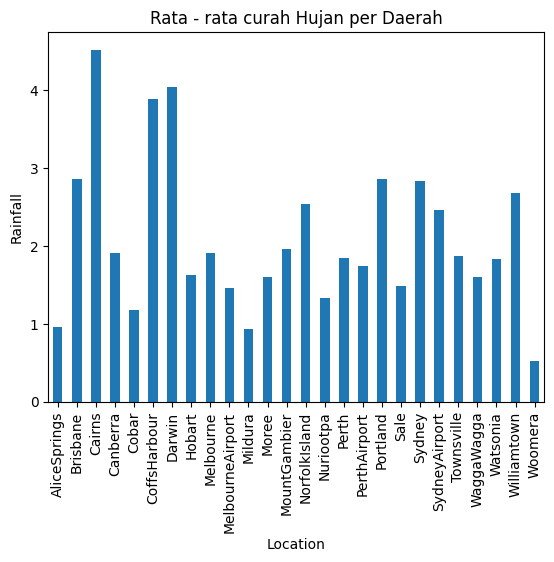

In [ ]:
# Plot bar chart
location_rainfall = df[['Location','Rainfall']].groupby(['Location'],as_index=True).mean()

# Menambahkan judul
location_rainfall.plot.bar(title = "Rata - rata curah Hujan per Daerah", fontsize=10, legend=False,)

# Menambahkan label sumbu x dan y
plt.ylabel('Rainfall')

# Menampilkan bar chart
plt.xticks(rotation=90)
plt.show()

Daerah dengan rata rata hujan tertinggi terjadi di daerah Cairns dan terendah di Woomera

**Mencari Central Tendency**

In [ ]:
# Menemukan waktu rata-rata dari kolom MaxTemp
mean = df['MaxTemp'].mean()
print(mean)

24.219205955334985


In [ ]:
median = df['WindGustSpeed'].median()
print(median)

39.0


In [ ]:
# Menemukan modus dari arah angin Australia di tiap daerahnya
modus = df['WindGustDir'].mode()
print(modus)

0    E
Name: WindGustDir, dtype: object


Dapat dilihat beberapa nilai statistik dasar (central tendency) dari beberapa atribut pada data. Nilai mean dari atribut _MaxTemp_ adalah 24.219205955334985. Untuk median _WindGustSpeed_ adalah 39.0. Untuk mencari modus dari kolom _WindGustDir_ menghasilkan output 'E' yang berarti di Negara Australia dan setiap daerahnya angin lebih sering datang dari arah Timur. Informasi ini dapat membantu kita untuk memahami distribusi data pada dataset.

**Mencari Variability**

In [ ]:
# Mencari variabilitas pada kolom 'MinTemp'
variance = np.var(df['MaxTemp'])
std_dev = np.std(df['MaxTemp'])
z = df['MaxTemp']
z.skew()
percentile = np.percentile(z, [25, 50, 75])
jangkauan = np.ptp(z)

print("Variansi kolom MinTemp:", variance)
print("Standar deviasi kolom MinTemp:", std_dev)
print("Skewness: ", z.skew())
print("Percentile: ", percentile)
print("Range: ", jangkauan)

Variansi kolom MinTemp: 48.58946806853596
Standar deviasi kolom MinTemp: 6.970614611964712
Skewness:  0.18501383859264484
Percentile:  [18.7 23.9 29.7]
Range:  44.0


Dari analisa variabilitas kolom 'MaxTemp' pada dataset, ditemukan nilai variansinya yang cukup besar sebesar 48.58 dan standar deviasi sebesar 6.97. Lalu nilai Skewness sebesar 0.185, dimana semakin mendekati nol menunjukkan distribusi data yang relatif simetris. Sehingga, distribusi data cenderung normal dengan nilai skewness sebesar 0.18. Hasil persentil menunjukkan penyebaran data di 25%, 50%, dan 75% yang pada output tersebut adalah 18.7, 23.9, dan 29.7. Rentang nilai suhu maximum pada dataset adalah 44.0, menunjukkan besar jangkauan nilai-nilai dalam data yang cukup besar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

---
##**Data Preprocessing**
---

**Encode Untuk Tipe Data Category**

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].apply(le.fit_transform)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,2017,6
142299,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,2017,6
142300,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,2017,6
142301,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,2017,6


**Mengetahui Korelasi Atribut Pada Data Terhadap 'RainTomorrow' dan Fiksasi Data Yang Digunakan**

In [ ]:
# Menghitung korelasi antara setiap atribut dengan kolom target 'RainTomorrow'
corr_matrix = df.corr()
corr_target = corr_matrix['RainTomorrow']

# Membuat dataframe korelasi antara semua atribut terhadap kolom 'RainTomorrow'
df_corr = pd.DataFrame({'attribute':corr_target.index, 'correlation':corr_target.values})
df_corr = df_corr.sort_values(by='correlation', ascending=False)

# Menampilkan dataframe korelasi antara semua atribut terhadap kolom 'RainTomorrow'
print(df_corr)

        attribute  correlation
21   RainTomorrow     1.000000
13    Humidity3pm     0.455358
17       Cloud3pm     0.388574
16       Cloud9am     0.323972
20      RainToday     0.309098
12    Humidity9am     0.271033
3        Rainfall     0.254342
7   WindGustSpeed     0.233158
11   WindSpeed3pm     0.088862
1         MinTemp     0.087428
10   WindSpeed9am     0.083904
6     WindGustDir     0.061751
8      WindDir9am     0.035992
9      WindDir3pm     0.032203
23          Month     0.001046
0        Location    -0.005100
22           Year    -0.006060
18        Temp9am    -0.018179
4     Evaporation    -0.130002
2         MaxTemp    -0.147467
19        Temp3pm    -0.183586
15    Pressure3pm    -0.230418
14    Pressure9am    -0.254816
5        Sunshine    -0.453407


Berdasarkan hasil korelasi terhadap atribut **RainTomorrow** diatas, maka kami memutuskan untuk menghapus beberapa atribut diantaranya Location, WindDir3pm, WinDir9am, WindGustDir, WindSpeed9am, WindSpeed3pm, Temp9am, Temp3pm, Year, dan Month. Hal tersebut dikarenakan atribut yang disebutkan tidak begitu mempengaruhi RainTomorrow.

In [ ]:
#Menghapus beberapa kolom yang tidak diperlukan
drop_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm", "Temp9am", "Temp3pm", "Year", "Month"]
df = df.drop(drop_cols, axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,20.0,13.0,1006.3,1004.4,2.0,5.0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,30.0,8.0,1012.9,1012.1,1.0,1.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,42.0,22.0,1012.3,1009.2,1.0,6.0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,37.0,22.0,1012.7,1009.1,1.0,5.0,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,19.0,15.0,1010.7,1007.4,1.0,6.0,0,0


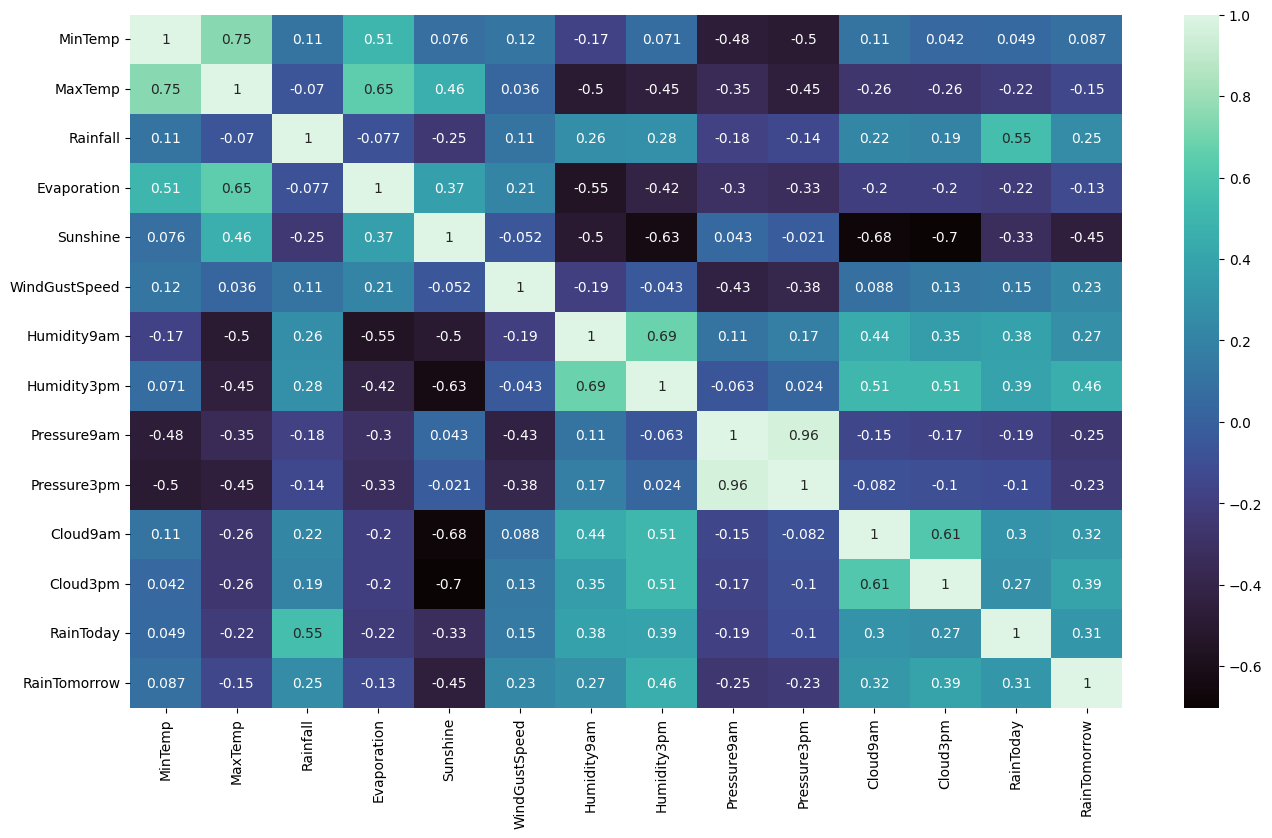

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='mako')
plt.show()

Sehingga, kolom atau atribut data yang akan kami gunakan adalah MinTemp,	MaxTemp,	Rainfall,	Evaporation,	Sunshine,	WindGustSpeed, Humidity9am,	Humidity3pm,	Pressure9am,	Pressure3pm,	Cloud9am,	Cloud3pm,	RainToday,	dan RainTomorrow.

**Membuat Split Data Test dan Data Train**

In [ ]:
X = df.drop(columns = 'RainTomorrow')
y = df['RainTomorrow']

print(X)
print(y)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
6049       17.9     35.2       0.0         12.0      12.3           48.0   
6050       18.4     28.9       0.0         14.8      13.0           37.0   
6052       19.4     37.6       0.0         10.8      10.6           46.0   
6053       21.9     38.4       0.0         11.4      12.2           31.0   
6054       24.2     41.0       0.0         11.2       8.4           35.0   
...         ...      ...       ...          ...       ...            ...   
142298     19.3     33.4       0.0          6.0      11.0           35.0   
142299     21.2     32.6       0.0          7.6       8.6           37.0   
142300     20.7     32.8       0.0          5.6      11.0           33.0   
142301     19.5     31.8       0.0          6.2      10.6           26.0   
142302     20.2     31.7       0.0          5.6      10.7           30.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
6049           

In [ ]:
topFeatures = SelectKBest(f_regression, k=13)
fit = topFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 13 Features yang Berpengaruh")
print(featureScores.nlargest(13, 'Score'))

Top 13 Features yang Berpengaruh
         Features         Score
7     Humidity3pm  14758.485347
4        Sunshine  14599.655378
11       Cloud3pm  10033.507663
10       Cloud9am   6615.920794
12      RainToday   5959.669505
6     Humidity9am   4472.982499
8     Pressure9am   3917.655568
2        Rainfall   3902.088392
5   WindGustSpeed   3243.354201
9     Pressure3pm   3163.304135
1         MaxTemp   1254.163774
3     Evaporation    969.889125
0         MinTemp    434.559106


dengan menggunakan F Regression fitur yang berpengaruh dalam model yaitu Humidity3pm, Sunshine, Cloud3pm, Cloud9pm, RainTodah, Humidity9am, 

In [ ]:
X_fit = df[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
            'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Rainfall']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.30, random_state=13)

In [ ]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

---
##**Pendefinisian Model**
---

Logistic regression adalah salah satu metode dalam analisis regresi yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel independen dengan variabel dependen biner atau kategorikal. Sedangkan SVM (Support Vector Machine) adalah metode pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. 

**a. Logistic Regresion**


In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

**a. Support Vector Machine**

In [ ]:
svm = SVC(kernel='linear')

---
##**Pelatihan Model**
---

**a. Logistic Regression**

In [ ]:
logreg = logreg.fit(X_train, y_train)
logreg

LogisticRegression(random_state=0, solver='liblinear')

**b. Support Vector Machine (SVM)**

In [ ]:
svm = svm.fit(X_train, y_train)
svm

SVC(kernel='linear')

---
##**Evaluasi Model**
---

**a. Logistic Regression**

In [ ]:
#Membuat Prediksi Output
y_pred = logreg.predict(X_test)

#Evaluasi Akurasi Classifier
print("Test score:", logreg.score(X_test, y_test))
print("Train score:", logreg.score(X_train, y_train))

Test score: 0.8526527236204655
Train score: 0.8530156479465235


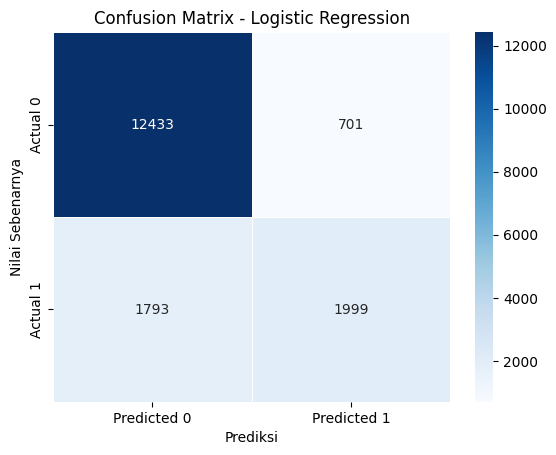

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13134
           1       0.74      0.53      0.62      3792

    accuracy                           0.85     16926
   macro avg       0.81      0.74      0.76     16926
weighted avg       0.84      0.85      0.84     16926



In [ ]:
#Membuat confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()

#Menampilkan Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred))
print('Recall :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))

Ringkasan Evaluasi Model
Akurasi : 0.8526527236204655
Presisi : 0.7403703703703703
Recall : 0.5271624472573839
F1 Score : 0.6158348736906961


Berdasarkan hasil confusion matrix dari logistic regression diatas dapat diketahui banyaknya nilai TP (True Positive) adalah 12433, FP (False Positive) adalah 1793, FN (False Negative) adalah 701, dan TN (True Negative) adalah 1999. Sehingga logistic regression memprediksi secara benar seluruh sampel 12433 dibandingkan dengan total sampel dengan accuracy 85.27%.

**b. Support Vector Machine**

In [ ]:
#Membuat Prediksi Output
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Evaluasi Akurasi Classifier
print("Test score:", svm.score(X_test, y_test))
print("Train score:", svm.score(X_train, y_train))

Test score: 0.8530662885501595
Train score: 0.8535980148883374


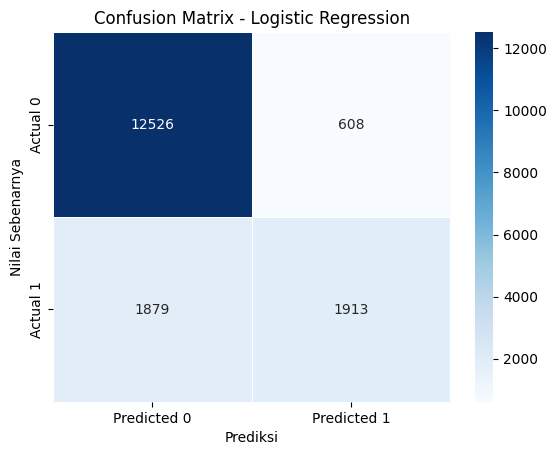

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13134
           1       0.76      0.50      0.61      3792

    accuracy                           0.85     16926
   macro avg       0.81      0.73      0.76     16926
weighted avg       0.84      0.85      0.84     16926



In [ ]:
#Membuat confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()

#Menampilkan Classification Report
print(classification_report(y_test, y_pred_svm))

In [ ]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_svm))
print('Presisi :', precision_score(y_test,y_pred_svm))
print('Recall :', recall_score(y_test,y_pred_svm))
print('F1 Score :', f1_score(y_test,y_pred_svm))

Ringkasan Evaluasi Model
Akurasi : 0.8530662885501595
Presisi : 0.7588258627528759
Recall : 0.5044831223628692
F1 Score : 0.6060510058609219


Berdasarkan hasil confusion matrix dari SVM diatas dapat diketahui banyaknya nilai TP (True Positive) adalah 12526, FP (False Positive) adalah 1879, FN (False Negative) adalah 608, dan TN (True Negative) adalah 1913. Sehingga SVM memprediksi secara benar seluruh sampel 12433 dibandingkan dengan total sampel dengan accuracy 85.31%.

---
##**Model Inference**
---

In [ ]:
MinTemp = float(input("Suhu Minimal : "))
MaxTemp = float(input("Suhu Maksimal : "))
Rainfall = float(input("Curah Hujan : "))
Evaporation = float(input("Evaporasi : "))
Sunshine = float(input("Sinar Matahari : "))
WindGustSpeed = float(input("Kecepatan Angin : "))
Humidity9am = float(input("Kelembapan Pukul 9 am : "))
Humidity3pm = float(input("Kelembapan Pukul 3 pm : "))
Pressure9am = float(input("Tekanan Udara 9 am : "))
Pressure3pm = float(input("Tekanan Udara 3 pm : "))
Cloud9am = float(input("Awan Pukul 9 am : "))
Cloud3pm = float(input("Awan Pukul 3 pm : "))
RainToday = input("Hari ini Hujan? (Yes/No) : ")

val = [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm]

hujan = {'No':0, 'Yes': 1}

for i in range(0,2):
    if hujan[RainToday]==i:
        val.append(1.0)
    else:
        next
        
print(val)

predict_logreg = logreg.predict([val])
predict_svm = svm.predict([val])

if predict_logreg == 0 : 
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok tidak hujan")
else: 
    print("Berdasarkan prediksi menggunakan Logistic regression Maka Besok hujan")
    
if predict_svm == 0 :
    print("Berdasarkan prediksi menggunakan SVM Maka Besok tidak hujan")
else: 
    print("Berdasarkan prediksi menggunakan SVM Maka Besok hujan")

Suhu Minimal : 27
Suhu Maksimal : 33
Curah Hujan : 0.6
Evaporasi : 4.7
Sinar Matahari : 8
Kecepatan Angin : 30
Kelembapan Pukul 9 am : 44
Kelembapan Pukul 3 pm : 20
Tekanan Udara 9 am : 1007
Tekanan Udara 3 pm : 1014
Awan Pukul 9 am : 6
Awan Pukul 3 pm : 8
Hari ini Hujan? (Yes/No) : No
[27.0, 33.0, 0.6, 4.7, 8.0, 30.0, 44.0, 20.0, 1007.0, 1014.0, 6.0, 8.0, 1.0]
Berdasarkan prediksi menggunakan Logistic regression Maka Besok tidak hujan
Berdasarkan prediksi menggunakan SVM Maka Besok tidak hujan


Pada percobaan prediksi diatas kami mencoba memasukkan inputan Suhu Minimal 27, Suhu Maksimal 33, Curah Hujan 0.6, Evaporasi 4.7, Sinar Matahari 8, Kecepatan Angin 30, Kelembapan Pukul 9am 44, Kelembapan Pukul 3pm 20, Tekanan Udara 9am 1007, Tekanan Udara 3pm 1014, Awan Pukul 9am 6, Awan Pukul 3pm 8, dan Hari ini Tidak Hujan. Adapun hasil prediksi yang didapatkan baik itu menggunakan logistic regression maupun SVM adalah bahwa Besok tidak hujan.

---
##**Kesimpulan**
---

Dari analisis yang telah kami lakukan, diperoleh kesimpulan sebagai berikut:
1. Berdasarkan dataset weatherAUS.csv terdapat 23 atribut yang diperkirakan sebagai faktor yang mempengaruhi prediksi hujan di Australia. Namun setelah dilakukan analisis dan dilakukan pencarian korelasi antar atributnya, kami menyimpulkan bahwa hanya terdapat 14 atribut yang menjadi faktor kuat dalam mempengaruhi prediksi hujan di Australia yaitu atribut MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, RainToday, dan RainTomorrow.
2. Pada analisis ini variabel dependen atau target yang digunakan yaitu RainTomorrow dan variabel independen yang digunakan yaitu MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, dan RainToday.
3. Berdasarkan analisis menggunakan logistic regression, didapatkan nilai Akurasi sebesar 85.27% (0.85265), nilai Presisi sebesar 74.04% (0.74037), nilai Recall sebesar 52.72% (0.52716), dan nilai F1 Score sebesar 0.61583 yang menunjukkan keseimbangan yang baik antara presisi dan recall.
4. Berdasarkan analisis menggunakan SVM, didapatkan nilai Akurasi sebesar 85.31% (0.85306), nilai Presisi sebesar 75.88% (0.7588), nilai Recall sebesar 50.45% (0.50448), dan nilai F1 Score sebesar 0.60605 yang menunjukkan keseimbangan yang baik antara presisi dan recall.
5. Berdasarkan analisis logistic regression dan SVM yang telah dilakukan, nilai akurasi dari model logistic regression dan SVM tidak jauh berbeda, keduanya memiliki nilai akurasi sebesar 85% yang mana kedua hasil tersebut cukup baik untuk dilakukan prediksi hujan di Australia. Dalam konteks evaluasi ini, tidak ada perbedaan yang signifikan antara Logistic Regression dan SVM. Keduanya memiliki performa yang serupa dalam hal akurasi, presisi, recall, dan F1 Score. Namun, jika kita lebih fokus pada presisi (untuk mengurangi false positive), maka SVM memiliki sedikit keunggulan. Tetapi, jika kita lebih fokus pada recall (untuk mengurangi false negative), maka Logistic Regression memiliki sedikit keunggulan.